# First model with scikit-learn

In this notebook, we present how to build predictive models on tabular
datasets, with only numerical features.

In particular we highlight:

* the scikit-learn API: `.fit(X, y)`/`.predict(X)`/`.score(X, y)`;
* how to evaluate the generalization performance of a model with a train-test
  split.

Here API stands for "Application Programming Interface" and refers to a set of
conventions to build self-consistent software. Notice that you can visit the
Glossary for more info on technical jargon.

## Loading the dataset with Pandas

We use the "adult_census" dataset described in the previous notebook. For more
details about the dataset see <http://www.openml.org/d/1590>.

Numerical data is the most natural type of data used in machine learning and
can (almost) directly be fed into predictive models. Here we load a subset of
the original data with only the numerical columns.

In [1]:
import pandas as pd
url = "https://raw.githubusercontent.com/INRIA/scikit-learn-mooc/master/datasets/adult-census-numeric.csv"
adult_census = pd.read_csv(url)

Let's have a look at the first records of this dataframe:

In [2]:
adult_census.head()

,age,capital-gain,capital-loss,hours-per-week,class
0,41,0,0,92,<=50K
1,48,0,0,40,<=50K
2,60,0,0,25,<=50K
3,37,0,0,45,<=50K
4,73,3273,0,40,<=50K


We see that this CSV file contains all information: the target that we would
like to predict (i.e. `"class"`) and the data that we want to use to train our
predictive model (i.e. the remaining columns). The first step is to separate
columns to get on one side the target and on the other side the data.

## Separate the data and the target

In [7]:
target_name = "class"
target = adult_census[target_name]
target

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
39068     <=50K
39069     <=50K
39070      >50K
39071     <=50K
39072      >50K
Name: class, Length: 39073, dtype: object

In [4]:
data = adult_census.drop(columns=[target_name])
data.head()

,age,capital-gain,capital-loss,hours-per-week
0,41,0,0,92
1,48,0,0,40
2,60,0,0,25
3,37,0,0,45
4,73,3273,0,40


We can now linger on the variables, also denominated features, that we later
use to build our predictive model. In addition, we can also check how many
samples are available in our dataset.

In [8]:
data.columns

Index(['age', 'capital-gain', 'capital-loss', 'hours-per-week'], dtype='object')

In [9]:
print(
    f"The dataset contains {data.shape[0]} samples and "
    f"{data.shape[1]} features"
)

The dataset contains 39073 samples and 4 features


## Fit a model and make predictions

We now build a classification model using the "K-nearest neighbors" strategy.
To predict the target of a new sample, a k-nearest neighbors takes into
account its `k` closest samples in the training set and predicts the majority
target of these samples.

<div class="admonition caution alert alert-warning">
<p class="first admonition-title" style="font-weight: bold;">Caution!</p>
<p class="last">We use a K-nearest neighbors here. However, be aware that it is seldom useful
in practice. We use it because it is an intuitive algorithm. In the next
notebook, we will introduce better models.</p>
</div>

The `fit` method is called to train the model from the input (features) and
target data.

In [13]:
!pip install scikit-learn

  Using cached scikit_learn-1.6.1-cp313-cp313-win_amd64.whl.metadata (15 kB)
  Using cached scipy-1.15.1-cp313-cp313-win_amd64.whl.metadata (60 kB)
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ------- -------------------------------- 2.1/11.1 MB 11.8 MB/s eta 0:00:01
   ---------------- ----------------------- 4.5/11.1 MB 11.8 MB/s eta 0:00:01
   ------------------------ --------------- 6.8/11.1 MB 11.8 MB/s eta 0:00:01
   --------------------------------- ------ 9.2/11.1 MB 11.8 MB/s eta 0:00:01
   ---------------------------------------  11.0/11.1 MB 11.7 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 10.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/43.6 MB ? eta -:--:--
   -- ------------------------------------- 2.4/43.6 MB 11.8 MB/s eta 0:00:04
   ---- ----------------------------------- 4.7/43.6 MB 11.8 MB/s eta 0:00:04
   ------ --------------------------------- 7.1/43.6 MB 11.8 MB/s eta 0:00:04
   -----


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
_ = model.fit(data, target)

Learning can be represented as follows:

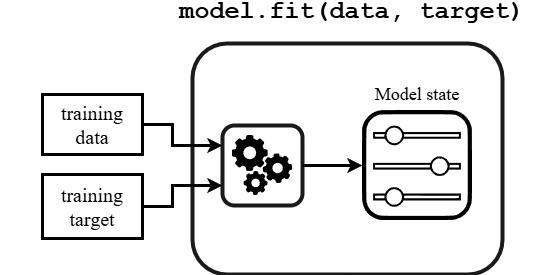

![Predictor fit diagram](../figures/api_diagram-predictor.fit.svg)

In scikit-learn an object that has a `fit` method is called an **estimator**.
The method `fit` is composed of two elements: (i) a **learning algorithm** and
(ii) some **model states**. The learning algorithm takes the training data and
training target as input and sets the model states. These model states are
later used to either predict (for classifiers and regressors) or transform
data (for transformers).

Both the learning algorithm and the type of model states are specific to each
type of model.

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">Here and later, we use the name <tt class="docutils literal">data</tt> and <tt class="docutils literal">target</tt> to be explicit. In
scikit-learn documentation, <tt class="docutils literal">data</tt> is commonly named <tt class="docutils literal">X</tt> and <tt class="docutils literal">target</tt> is
commonly called <tt class="docutils literal">y</tt>.</p>
</div>

Let's use our model to make some predictions using the same dataset.

In [15]:
target_predicted = model.predict(data)

An estimator (an object with a `fit` method) with a `predict` method is called
a **predictor**. We can illustrate the prediction mechanism as follows:

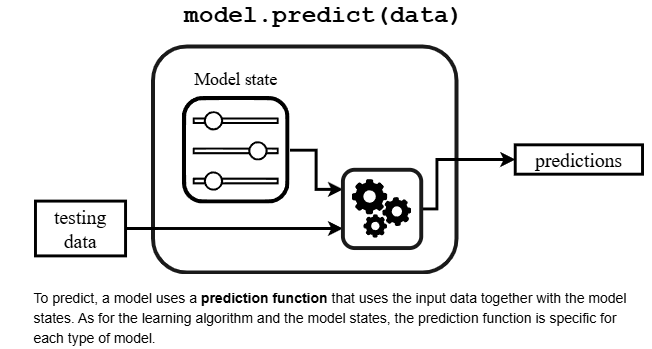

![Predictor predict diagram](../figures/api_diagram-predictor.predict.svg)

To predict, a model uses a **prediction function** that uses the input data
together with the model states. As for the learning algorithm and the model
states, the prediction function is specific for each type of model.

Let's now have a look at the computed predictions. For the sake of simplicity,
we look at the five first predicted targets.

In [16]:
target_predicted[:5]

array([' >50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K'], dtype=object)

Indeed, we can compare these predictions to the actual data...

In [17]:
target[:5]

0     <=50K
1     <=50K
2     <=50K
3     <=50K
4     <=50K
Name: class, dtype: object

...and we could even check if the predictions agree with the real targets:

In [18]:
target[:5] == target_predicted[:5]

0    False
1     True
2     True
3     True
4     True
Name: class, dtype: bool

In [19]:
print(
    "Number of correct prediction: "
    f"{(target[:5] == target_predicted[:5]).sum()} / 5"
)

Number of correct prediction: 4 / 5


Here, we see that our model makes a mistake when predicting for the first
sample.

To get a better assessment, we can compute the average success rate.

In [20]:
(target == target_predicted).mean()

np.float64(0.8238169580016892)

This result means that the model makes a correct prediction for approximately
82 samples out of 100. Note that we used the same data to train and evaluate
our model. Can this evaluation be trusted or is it too good to be true?

## Train-test data split

When building a machine learning model, it is important to evaluate the
trained model on data that was not used to fit it, as **generalization** is
more than memorization (meaning we want a rule that generalizes to new data,
without comparing to data we memorized). It is harder to conclude on
never-seen instances than on already seen ones.

Correct evaluation is easily done by leaving out a subset of the data when
training the model and using it afterwards for model evaluation. The data used
to fit a model is called training data while the data used to assess a model
is called testing data.

We can load more data, which was actually left-out from the original data set.

In [22]:
url = "https://raw.githubusercontent.com/INRIA/scikit-learn-mooc/master/datasets/adult-census-numeric-test.csv"
adult_census_test = pd.read_csv(url)

From this new data, we separate our input features and the target to predict,
as in the beginning of this notebook.

In [23]:
target_test = adult_census_test[target_name]
data_test = adult_census_test.drop(columns=[target_name])

We can check the number of features and samples available in this new set.

In [24]:
print(
    f"The testing dataset contains {data_test.shape[0]} samples and "
    f"{data_test.shape[1]} features"
)

The testing dataset contains 9769 samples and 4 features


Instead of computing the prediction and manually computing the average success
rate, we can use the method `score`. When dealing with classifiers this method
returns their performance metric.

In [25]:
accuracy = model.score(data_test, target_test)
model_name = model.__class__.__name__

print(f"The test accuracy using a {model_name} is {accuracy:.3f}")

The test accuracy using a KNeighborsClassifier is 0.807


We use the generic term **model** for objects whose goodness of fit can be
measured using the `score` method. Let's check the underlying mechanism when
calling `score`:

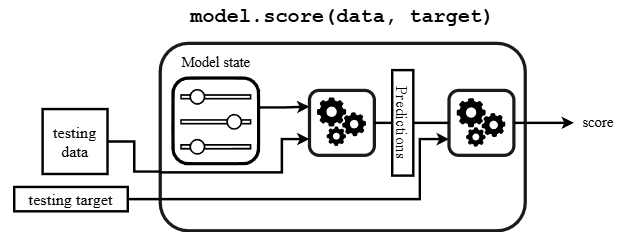

![Predictor score diagram](../figures/api_diagram-predictor.score.svg)

To compute the score, the predictor first computes the predictions (using the
`predict` method) and then uses a scoring function to compare the true target
`y` and the predictions. Finally, the score is returned.

If we compare with the accuracy obtained by wrongly evaluating the model on
the training set, we find that this evaluation was indeed optimistic compared
to the score obtained on a held-out test set.

It shows the importance to always testing the generalization performance of
predictive models on a different set than the one used to train these models.
We will discuss later in more detail how predictive models should be
evaluated.

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">In this MOOC, we refer to <strong>generalization performance</strong> of a model when
referring to the test score or test error obtained by comparing the prediction
of a model and the true targets. Equivalent terms for <strong>generalization
performance</strong> are predictive performance and statistical performance. We refer
to <strong>computational performance</strong> of a predictive model when assessing the
computational costs of training a predictive model or using it to make
predictions.</p>
</div>

## Notebook Recap

In this notebook we:

* fitted a **k-nearest neighbors** model on a training dataset;
* evaluated its generalization performance on the testing data;
* introduced the scikit-learn API `.fit(X, y)` (to train a model),
  `.predict(X)` (to make predictions) and `.score(X, y)` (to evaluate a
  model);
* introduced the jargon for estimator, predictor and model.